# Python e Finanças

### Uma das grandes aplicações do Python é para Finanças/Mercado Financeiro

### Não é bem uma integração, pois usaremos bibliotecas que já conhecemos, só que aplicadas a ativos financeiros

1. pandas
2. matplotlib
3. numpy

Essas são as 3 principais bibliotecas usadas. Então essencialmente é uma aplicação de tudo o que aprendemos nessas 3 bibliotecas.

Vamos instalar também o pandas_datareader para puxar cotações diretamente do yahoo finance. Use o pip para isso.

### Vamos analisar o Petro

In [3]:
!pip install datareader


     ---------------------------------------- 57.3/57.3 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 35.6/35.6 MB 6.9 MB/s eta 0:00:00
  Running setup.py install for datareader: started
  Running setup.py install for datareader: finished with status 'done'


  DEPRECATION: datareader is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

cotacao_petro = web.DataReader('PETR4.SA', data_source='yahoo', start='2022-01-01', end='2022-11-14')
display(cotacao_petro)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,29.219999,28.530001,28.540001,29.090000,52704700.0,19.430082
2022-01-04,29.400000,28.910000,29.160000,29.200001,51739200.0,19.503555
2022-01-05,29.270000,27.940001,29.190001,28.070000,78459800.0,18.748791
2022-01-06,28.650000,27.840000,28.290001,28.049999,61163100.0,18.735435
2022-01-07,28.290001,27.820000,28.110001,28.180000,47507600.0,18.822266
...,...,...,...,...,...,...
2022-11-08,27.530001,26.750000,27.059999,27.350000,94745400.0,27.350000
2022-11-09,27.950001,26.639999,27.150000,26.900000,103303500.0,26.900000
2022-11-10,26.889999,25.610001,26.080000,26.120001,145470100.0,26.120001


### Analisando o Gráfico

<AxesSubplot: xlabel='Date'>

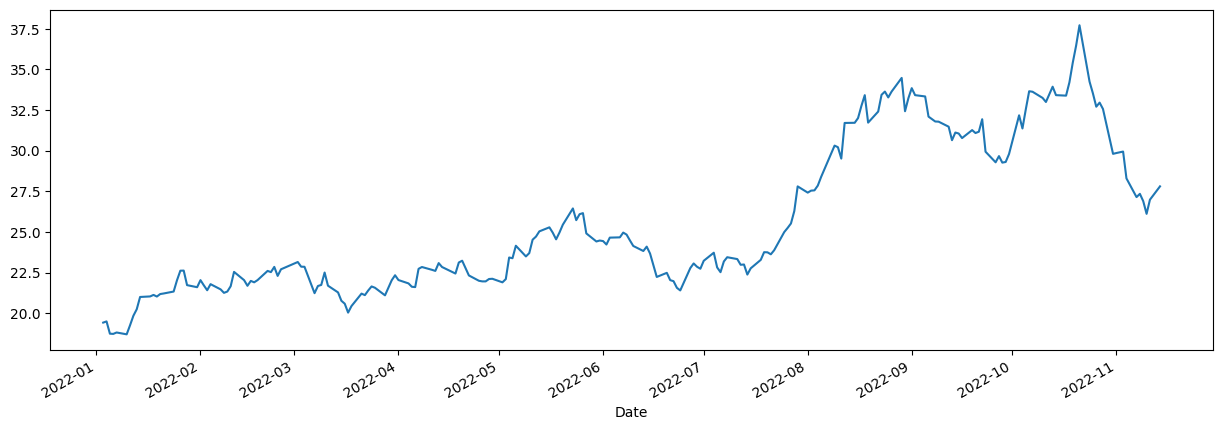

In [12]:
cotacao_petro['Adj Close'].plot(figsize=(15,5))

### Retorno do Petro


In [22]:
retorno_petro = cotacao_petro['Adj Close'][-1] / cotacao_petro['Adj Close'][0] - [1]
print('Retorno Petrobras: {:.2%}'.format(float(retorno_petro)))

Retorno Petrobras: 43.13%


### Analisando com Média Móvel

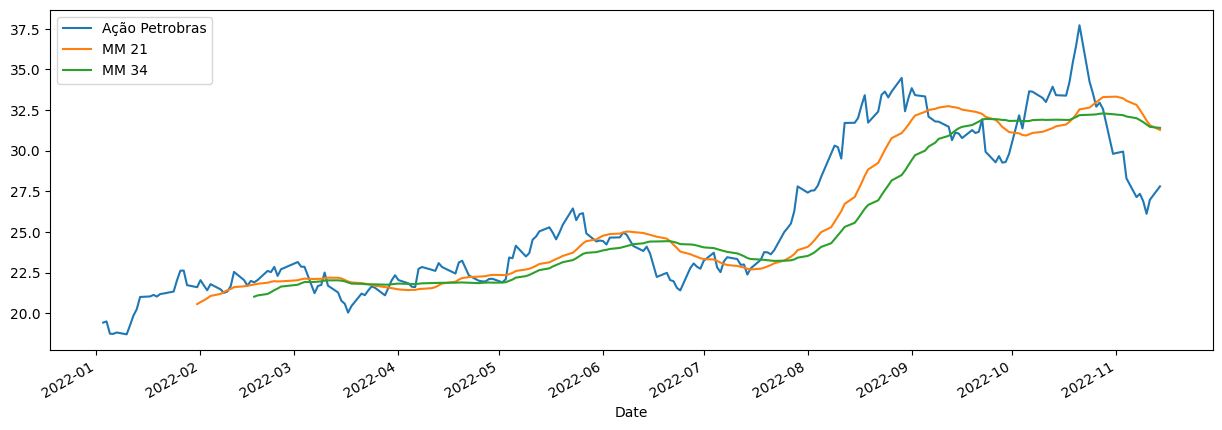

In [30]:
cotacao_petro['Adj Close'].plot(figsize=(15,5), label="Ação Petrobras")
cotacao_petro['Adj Close'].rolling(21).mean().plot(label="MM 21")
cotacao_petro['Adj Close'].rolling(34).mean().plot(label="MM 34")
plt.legend()
plt.show()